---
title: "GIOZA Case Study: Temperature EDA"
format:
  html:
    toc: true
    toc-title: Contents
    toc-depth: 4
    code-fold: show
    self-contained: true
jupyter: python3
---

# Loading Packages and Data

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from plotnine import *

In [2]:
factory_temp = pd.read_csv('data\temperature.csv')

# Data Preparation

In [3]:
# check for missing values
print( factory_temp.isnull().sum() )

papp    0
at      0
dtype: int64 

Confirmation        0
Ordre               0
Poste de travail    0
Centre de coûts     0
sku                 0
units               0
weight_kg           0
scrap               0
group               0
at                  0
dtype: int64 

at    0
T     0
dtype: int64


In [4]:
# return dtypes
print( factory_temp.dtypes )

papp    float64
at       object
dtype: object 

Confirmation          int64
Ordre                 int64
Poste de travail      int64
Centre de coûts       int64
sku                   int64
units                 int64
weight_kg           float64
scrap                 int64
group                object
at                   object
dtype: object 

at     object
T     float64
dtype: object


In [3]:
# convert predictors into proper datatype
factory_temp['at'] = pd.to_datetime(factory_temp['at'])
factory_temp = factory_temp.sort_values(by=['at'], ascending=True).reset_index(drop=True)

print( factory_temp.dtypes )

papp                float64
at      datetime64[ns, UTC]
dtype: object 

Confirmation                     object
Ordre                            object
Poste de travail                 object
Centre de coûts                  object
sku                              object
units                             int64
weight_kg                       float64
scrap                             int64
group                            object
at                  datetime64[ns, UTC]
dtype: object 

at    datetime64[ns, UTC]
T                 float64
dtype: object


# Data Visualizations

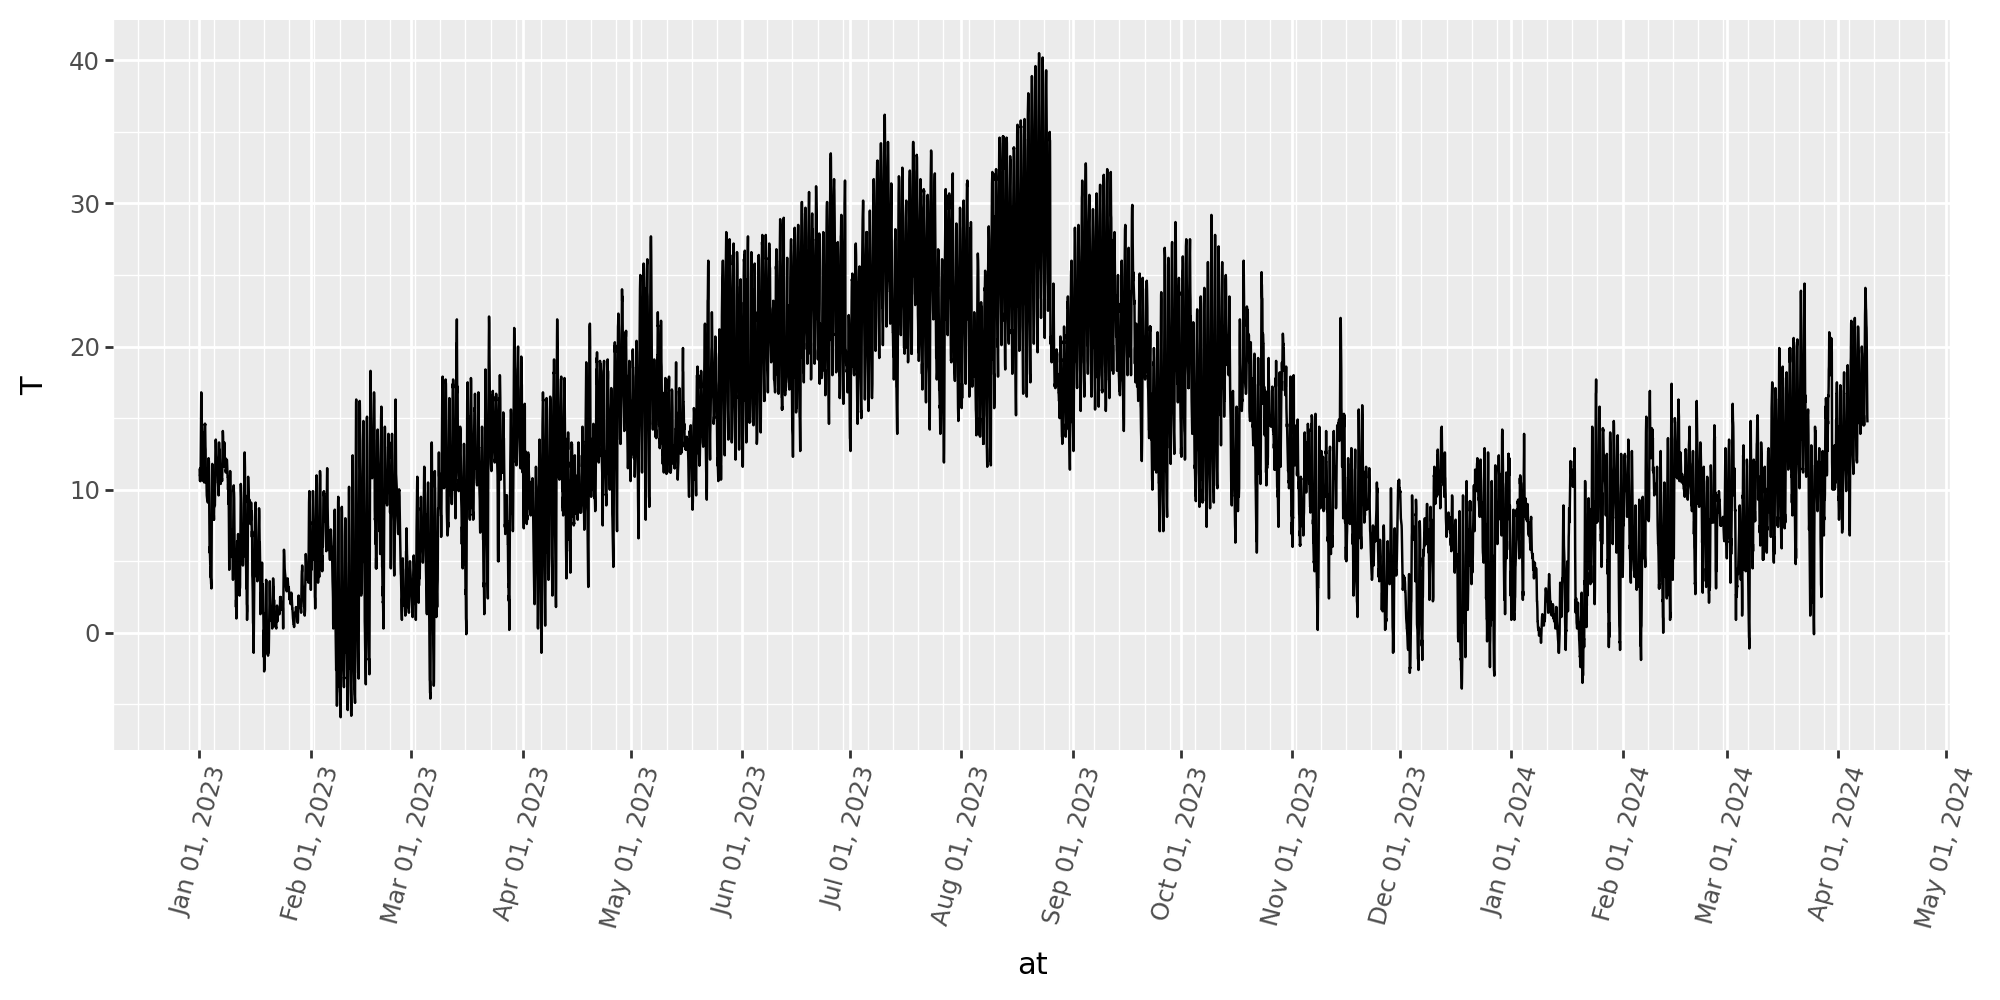

In [29]:
(
    ggplot(factory_temp, aes(x='at', y='T'))
    + geom_line()
    + scale_x_datetime(date_breaks='1 month', date_minor_breaks='1 week', date_labels="%b %d, %Y")
    + theme(figure_size=(10,5), axis_text_x=element_text(angle=75))
    + labs(x = 'Date (UTC)', y = 'Temperature (Celsius)', title = 'Temperature over Time')
)